In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
user_df = pd.read_csv('data\\ratings.csv')
user_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
movies_df = pd.read_csv('data\\movies.csv')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
print('Number of users: ', len(pd.unique(user_df['userId'])))
print('Number of movies: ', len(pd.unique(movies_df['movieId'])))

Number of users:  610
Number of movies:  9742


# Exploring the genres

## First, we'll look at the number of times each of the listed genres has been assigned to a movie in the data set

From the plot, we can see that Drama is the most populous genre in the data set with 4361 occurences. This is followed by Comedy, Thriller, Action, and Romance

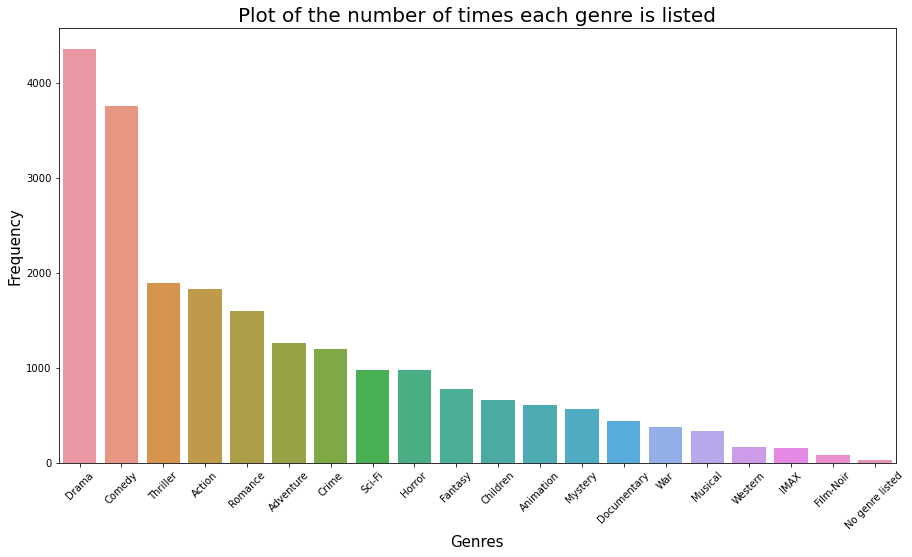

In [5]:
#Find out the frequency of genres
genres = movies_df['genres'].str.split("[|, ' ']",expand=True).stack().value_counts()
genres['No genre listed'] = genres['(no']
del genres['genres']
del genres['listed)']
del genres['(no']
keys = list(genres.keys())
values = [genres[k] for k in keys]
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
plt.xlabel('Genres', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Plot of the number of times each genre is listed',fontsize=20)
sns.barplot(x=keys, y=values)

In [ ]:
#TODO
#find 5 movies with highest consolidated ratings, and their genres
#find 5 movies with lowest consolidated ratings, and their genres
#find the genres with the highest normalized rating (add the ratings together for each movie that has a specific 
# genre, divide it by the number of times that genre comes up)
#find the preferences of a single user

## Let's look at the highest rated movies and the genres they are listed under

In [6]:
#Sort the movie ids by arithmetic means of their rating, non-ascending
sorted_rating = user_df[['movieId','rating']].groupby('movieId').mean().sort_values(by='rating', ascending=False)
#Join the movies db with movieId to find the names of the movies
sorted_rating_names = pd.merge(sorted_rating, movies_df, on = 'movieId')
sorted_rating_names.head()


,movieId,rating,title,genres
0,88448,5.0,Paper Birds (Pájaros de papel) (2010),Comedy|Drama
1,100556,5.0,"Act of Killing, The (2012)",Documentary
2,143031,5.0,Jump In! (2007),Comedy|Drama|Romance
3,143511,5.0,Human (2015),Documentary
4,143559,5.0,L.A. Slasher (2015),Comedy|Crime|Fantasy
